## Tests etc.

In [1]:
%pylab inline
import glob
import os
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


/Users/dansandiford/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
topdir = "/Users/dansandiford/Documents/model_local_copy/underworld/vueesc/"
workdir = '/Users/dansandiford/Documents/programming/earthsci_code/python/vueesc'

In [3]:
comb = np.genfromtxt(os.path.join(topdir,  "metrics_test/results/T/0/Base/results_modelT_0_Base.dat"), 
                     skip_header=0, skip_footer=1)

allmods  = np.genfromtxt(os.path.join(topdir,  "results/T/0/Base/results_modelT_0_Base.dat"), 
                         skip_header=0, skip_footer=1)

staNoCrust  = np.genfromtxt(os.path.join(topdir,  "results/T/1/1/results_modelT_1_1.dat"), 
                         skip_header=0, skip_footer=1)


#Update swarm every 2nd timestep
swarmUpdateTest  = np.genfromtxt(os.path.join(topdir,  "results/T/3/1/results_modelT_3_1.dat"), 
                         skip_header=0, skip_footer=1)

#Allowed direct air-crust material change
airCrust  = np.genfromtxt(os.path.join(topdir,  "results/T/4/10/results_modelT_4_10.dat"), 
                         skip_header=0, skip_footer=1)

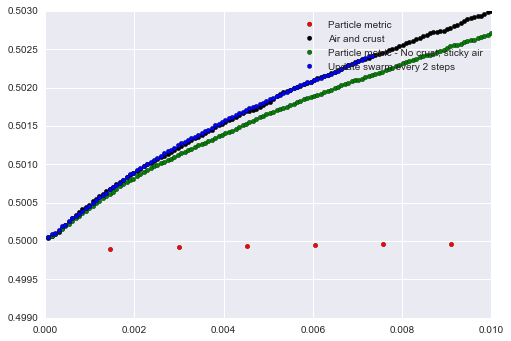

In [4]:
col = 4

ax1 = plt.subplot(111)

ax1.set_xlim([0.0, 0.01])
ax1.set_ylim([0.499, 0.503])



plt.scatter(comb[:,0], comb[:,col], c='r',label="Particle metric")
plt.scatter(allmods[:,0], allmods[:,col], c='k',label="Air and crust ")
plt.scatter(staNoCrust[:,0], staNoCrust[:,col], c='g',label="Particle metric - No crust, sticky air")
plt.scatter(swarmUpdateTest [:,0], swarmUpdateTest [:,col], c='b',label="Update swarm every 2 steps")



plt.legend()


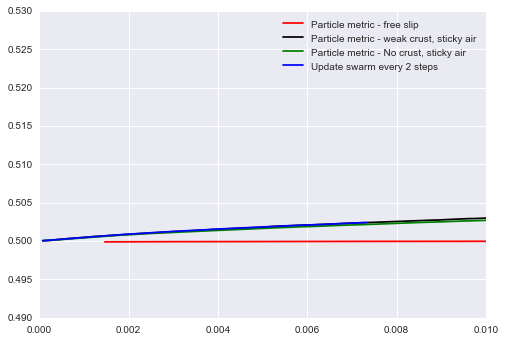

In [5]:
col = 4
ax1 = plt.subplot(111)

ax1.set_xlim([0.0, 0.01])
#ax1.set_ylim([0.499, 0.503])



plt.plot(comb[:,0], comb[:,col], c='r',label="Particle metric - free slip")
plt.plot(allmods[:,0], allmods[:,col], c='k',label="Particle metric - weak crust, sticky air")
plt.plot(staNoCrust[:,0], staNoCrust[:,col], c='g',label="Particle metric - No crust, sticky air")
plt.plot(swarmUpdateTest [:,0], swarmUpdateTest [:,col], c='b',label="Update swarm every 2 steps")



plt.legend()

## A0 (T0) vs reference

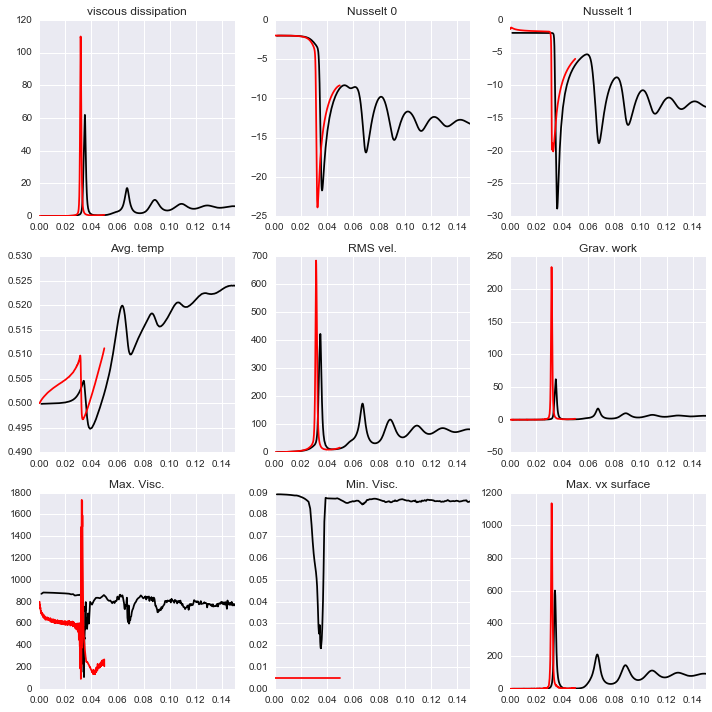

In [6]:
fig = plt.figure(figsize=(10, 10))


#Viscous diss
ax1 = fig.add_subplot(331)
ax1.plot(comb[:,0], comb[:,1]/(2*44668.35), 'k-',label="Particle metric")
ax1.plot(allmods[:,0], allmods[:,1]/(2*44668.35), 'r-',label="Air and crust ")

ax1.set_xlim([0.0, 0.15])
ax1.set_title('viscous dissipation')

#Nu0
ax2 = fig.add_subplot(332)
ax2.plot(comb[:,0], comb[:,2], 'k-',label="Particle metric")
ax2.plot(allmods[:,0], allmods[:,2], 'r-',label="Air and crust ")

ax2.set_xlim([0.0, 0.15])
ax2.set_title('Nusselt 0')

ax3 = fig.add_subplot(333)
ax3.plot(comb[:,0], comb[:,3], 'k-',label="Particle metric")
ax3.plot(allmods[:,0], allmods[:,3], 'r-',label="Air and crust ")
ax3.set_xlim([0.0, 0.15])
ax3.set_title('Nusselt 1')

ax4 = fig.add_subplot(334)
ax4.plot(comb[:,0], comb[:,4], 'k-',label="Particle metric")
ax4.plot(allmods[:,0], allmods[:,4], 'r-',label="Air and crust ")
ax4.set_xlim([0.0, 0.15])
ax4.set_title('Avg. temp')

ax5 = fig.add_subplot(335)
ax5.plot(comb[:,0], comb[:,5], 'k-',label="Particle metric")
ax5.plot(allmods[:,0], allmods[:,5], 'r-',label="Air and crust ")
ax5.set_xlim([0.0, 0.15])
ax5.set_title('RMS vel.')


#This Metric is broken for particles
#ax6 = fig.add_subplot(336)
#ax6.plot(comb[:,0], comb[:,6], 'k-',label="Particle metric")
#ax6.plot(comb[:,0], comb[:,15], 'r--',label="Mesh metric")
#ax6.plot(orig[:,0], orig[:,6], 'b--',label="Tosi model")
#ax6.set_title('RMS vel. surface')


ax6 = fig.add_subplot(336)
ax6.plot(comb[:,0], comb[:,8]/2, 'k-',label="Particle metric")
ax6.plot(allmods[:,0], allmods[:,8], 'r-',label="Air and crust ")
ax6.set_xlim([0.0, 0.15])
ax6.set_title('Grav. work')

ax7 = fig.add_subplot(337)
ax7.plot(comb[:,0], comb[:,9], 'k-',label="Particle metric")
ax7.plot(allmods[:,0], allmods[:,9], 'r-',label="Air and crust ")
ax7.set_xlim([0.0, 0.15])
ax7.set_title('Max. Visc.')

ax8 = fig.add_subplot(338)
ax8.plot(comb[:,0], comb[:,10], 'k-',label="Particle metric")
ax8.plot(allmods[:,0], allmods[:,10], 'r-',label="Air and crust ")
ax8.set_xlim([0.0, 0.15])
ax8.set_title('Min. Visc.')

#This Metric is broken for Mesh, (probably working for particles)
ax9 = fig.add_subplot(339)
ax9.plot(comb[:,0], comb[:,7], 'k-',label="Particle metric")
ax9.plot(allmods[:,0], allmods[:,7], 'r-',label="Air and crust ")
ax9.set_xlim([0.0, 0.15])
ax9.set_title('Max. vx surface')





plt.tight_layout()
fig = plt.gcf()

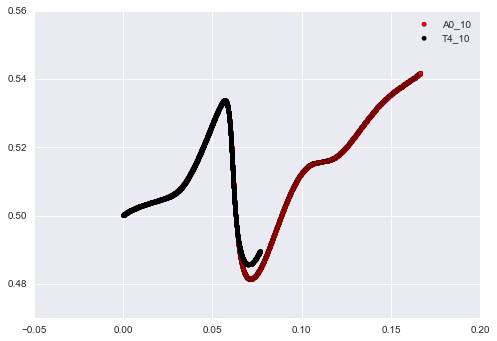

In [14]:
#This plot compares direct Air-Crust transition, to teh default, where air can only become mantle
A0_10  = np.genfromtxt(os.path.join(topdir,  "results/A/0/10/results_modelA_0_10.dat"), skip_header=0, skip_footer=1)


col = 4

ax1 = plt.subplot(111)

#ax1.set_xlim([0.0, 0.01])
#ax1.set_ylim([0.499, 0.503])



plt.scatter(A0_10[:,0], A0_10[:,col], c='r',label="A0_10")
plt.scatter(airCrust[:,0], airCrust[:,col], c='k',label="T4_10")



plt.legend()

## B2 - test cohesion scaling

In [7]:
B2_1  = np.genfromtxt(os.path.join(topdir,  "results/B/2/1/results_modelB_2_1.dat"), skip_header=0, skip_footer=1)
B2_4  = np.genfromtxt(os.path.join(topdir,  "results/B/2/4/results_modelB_2_4.dat"), skip_header=0, skip_footer=1)
B2_7  = np.genfromtxt(os.path.join(topdir,  "results/B/2/7/results_modelB_2_7.dat"), skip_header=0, skip_footer=1)
B2_10  = np.genfromtxt(os.path.join(topdir,  "results/B/2/10/results_modelB_2_10.dat"), skip_header=0, skip_footer=1)

In [ ]:
col = 3
ax1 = plt.subplot(111)

#ax1.set_xlim([0.0, 0.05])
#ax1.set_ylim([0.499, 0.503])



plt.plot(B2_1[:,0], B2_1[:,col], c='r',label="B2_1")
plt.plot(B2_4[:,0], B2_4[:,col], c='k',label="B2_4")
plt.plot(B2_7[:,0], B2_7[:,col], c='g',label="B2_7")
plt.plot(B2_10[:,0], B2_10[:,col], c='b',label="B2_10")



plt.legend()

## Test temp update requirements for A2 models

Can't quite remember what was run here, but it demonstrates the importance of temp updates in the sticky air region, and allowing topography to build (i.e having large TOPOHEIGHT), otherwise, there is too much advection across the boundary.

In [9]:
B2_1  = np.genfromtxt(os.path.join(topdir,  "results/B/2/1/results_modelB_2_1.dat"), skip_header=0, skip_footer=1)
B2_4  = np.genfromtxt(os.path.join(topdir,  "results/B/2/4/results_modelB_2_4.dat"), skip_header=0, skip_footer=1)
B2_7  = np.genfromtxt(os.path.join(topdir,  "results/B/2/7/results_modelB_2_7.dat"), skip_header=0, skip_footer=1)
B2_10  = np.genfromtxt(os.path.join(topdir,  "results/B/2/10/results_modelB_2_10.dat"), skip_header=0, skip_footer=1)


A2_1  = np.genfromtxt(os.path.join(topdir,  "results/A/2/1/results_modelA_2_1.dat"), skip_header=0, skip_footer=1)
T6_1  = np.genfromtxt(os.path.join(topdir,  "results/T/6/1/results_modelT_6_1.dat"), skip_header=0, skip_footer=1)
T7_1  = np.genfromtxt(os.path.join(topdir,  "results/T/7/1/results_modelT_7_1.dat"), skip_header=0, skip_footer=1)

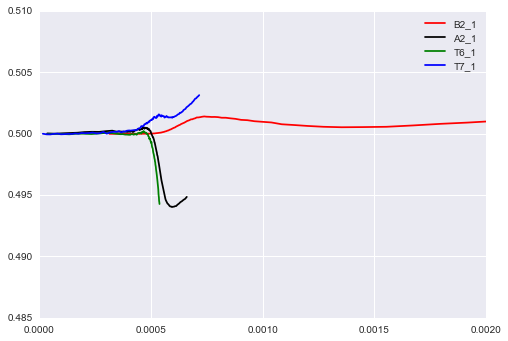

In [10]:
col = 4

ax1 = plt.subplot(111)

ax1.set_xlim([0.0, 0.002])
#ax1.set_ylim([0.499, 0.503])



plt.plot(B2_1[:,0], B2_1[:,col], c='r',label="B2_1")
plt.plot(A2_1[:,0],A2_1[:,col], c='k',label="A2_1") # No temp upadate, TOPOHEIGHT = 0
plt.plot(T6_1[:,0],T6_1[:,col], c='g',label="T6_1") # temp upadate, TOPOHEIGHT = 0
plt.plot(T7_1[:,0],T7_1[:,col], c='b',label="T7_1") # temp upadate, TOPOHEIGHT = 20?





plt.legend()

In [16]:
T8_1  = np.genfromtxt(os.path.join(topdir,  "results/T/8/1/results_modelT_8_1.dat"), skip_header=0, skip_footer=1)
A0_1  = np.genfromtxt(os.path.join(topdir,  "results/A/0/1/results_modelA_0_1.dat"), skip_header=0, skip_footer=1)


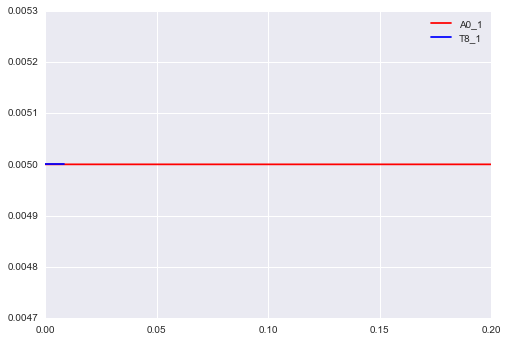

In [28]:
col = 10

ax1 = plt.subplot(111)

#ax1.set_xlim([0.0, 0.01])
#ax1.set_ylim([0.499, 0.503])



plt.plot(A0_1[:,0], A0_1[:,col], c='r',label="A0_1")
plt.plot(T8_1[:,0],T8_1[:,col], c='b',label="T8_1") # metric changes



plt.legend()

In [23]:
T9_1  = np.genfromtxt(os.path.join(topdir,  "results/T/9/1/results_modelT_9_1.dat"), skip_header=0, skip_footer=1)

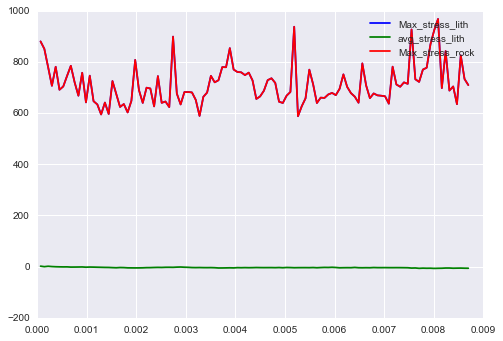

In [35]:
col = 15

ax1 = plt.subplot(111)

#ax1.set_xlim([0.0, 0.01])
#ax1.set_ylim([0.499, 0.503])



#plt.plot(A0_1[:,0], A0_1[:,col], c='r',label="A0_1")
plt.plot(T8_1[:,0],T8_1[:,15], c='b',label="Max_stress_lith") # metric changes
plt.plot(T8_1[:,0],T8_1[:,13], c='g',label="avg_stress_lith") # metric changes

plt.plot(T8_1[:,0],T8_1[:,14], c='r',label="Max_stress_rock") # metric changes




plt.legend()